Network Analaysis and Language Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV


Basic Network Analysis Task

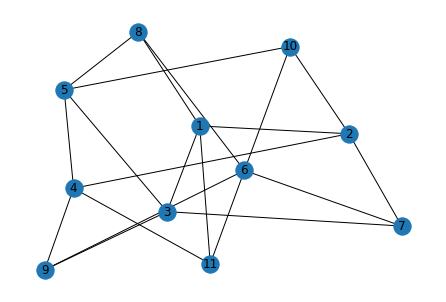

In [2]:
network = nx.Graph()

network.add_edges_from([(1,2),(1,3),(1,8),(1,11),(2,4),(2,7),(2,10),(3,5),(3,7),(3,9),(4,5),(4,9),(4,11),(5,8),(5,10),(6,7),(6,8),(6,9),(6,10),(6,11)])

nx.star_graph (network)
nx.draw(network, with_labels=True)

In [3]:
network_degs = [network.degree()[x] for x in network.nodes()]

network_degs = pd.Series(network_degs)
print ("The degree of the network is ", network_degs.value_counts())

print ("The average numbers of links per node is", network_degs.sum()/ len (network.nodes))

The degree of the network is  4    5
3    5
5    1
dtype: int64
The average numbers of links per node is 3.6363636363636362


In [4]:
print ('The network diameter is ', nx.diameter(network))

The network diameter is  2


In [5]:
degrees = nx.degree_centrality(network)
closeness = nx.closeness_centrality(network)
betweenness = nx.betweenness_centrality(network)
eigenvector = nx.eigenvector_centrality(network)
pagerank = nx.pagerank(network)

centralitynetwork = pd.DataFrame()
centralitynetwork['degree_centrality'] = degrees.values()
centralitynetwork['closeness_centrality'] = closeness.values()
centralitynetwork['betweenness_centrality'] = betweenness.values()
centralitynetwork['eigenvector_centrality'] = eigenvector.values()
centralitynetwork['pagerank'] = pagerank.values()

centralitynetwork

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
0,0.4,0.625000,0.088889,0.317183,0.099103
1,0.4,0.625000,0.088889,0.317183,0.099103
2,0.4,0.625000,0.088889,0.317183,0.099103
3,0.3,0.588235,0.033333,0.269854,0.076496
4,0.3,0.588235,0.033333,0.269854,0.076496
5,0.4,0.625000,0.088889,0.317183,0.099103
6,0.3,0.588235,0.033333,0.269854,0.076496
7,0.3,0.588235,0.033333,0.269854,0.076496
8,0.4,0.625000,0.088889,0.317183,0.099103
9,0.3,0.588235,0.033333,0.269854,0.076496


In [6]:
centralitynetwork.corr()

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
degree_centrality,1.000000,0.999097,0.993058,1.000000,0.999991
closeness_centrality,0.999097,1.000000,0.997158,0.999097,0.999272
betweenness_centrality,0.993058,0.997158,1.000000,0.993058,0.993557
eigenvector_centrality,1.000000,0.999097,0.993058,1.000000,0.999991
pagerank,0.999991,0.999272,0.993557,0.999991,1.000000


From this we can see that while most of them are closely related degree centrality and eigenvector centrality are exactly same while page rank comes close second but all the values are quite similar and close to each other.

Network Centrality Measuers

In [7]:
marvel = pd.read_csv('edges.csv')

marvel.head()

,source,target
0,Baron Zemo,Blackout (Marcus Daniels)
1,Baron Zemo,Vermin (comics)
2,N'astirh,S'ym
3,N'astirh,Belasco (Marvel Comics)
4,N'astirh,Madelyne Pryor


In [8]:
marvel_network = nx.from_pandas_edgelist(marvel, 'source', 'target')
marvel_network.edges()

EdgeView([('Baron Zemo', 'Blackout (Marcus Daniels)'), ('Baron Zemo', 'Vermin (comics)'), ("N'astirh", "S'ym"), ("N'astirh", 'Belasco (Marvel Comics)'), ("N'astirh", 'Madelyne Pryor'), ("S'ym", 'Belasco (Marvel Comics)'), ('Belasco (Marvel Comics)', 'Magik (Illyana Rasputin)'), ('Madelyne Pryor', 'Nate Grey'), ('Silver Sable', 'Peregrine (comics)'), ('Hope Summers (comics)', 'Cable (comics)'), ('Cable (comics)', 'Domino (comics)'), ('Cable (comics)', 'Rachel Summers'), ('Cable (comics)', 'Deadpool'), ('Night Thrasher (Dwayne Taylor)', "Midnight's Fire"), ('Night Thrasher (Dwayne Taylor)', 'Silhouette (comics)'), ('Orb (comics)', 'Justin Hammer'), ('Justin Hammer', 'Spymaster (comics)'), ('Justin Hammer', 'Abner Jenkins'), ('Justin Hammer', 'Stiletto (comics)'), ('Justin Hammer', 'Discus (comics)'), ('Forge (comics)', 'Storm (Marvel Comics)'), ('Storm (Marvel Comics)', 'Black Panther (comics)'), ('U.S. Agent (character)', 'Battlestar (comics)'), ('Venom (Marvel Comics character)', 'Carn

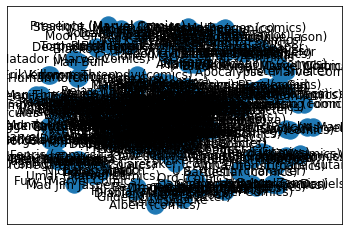

In [9]:
nx.draw_networkx(marvel_network)

In [10]:
list (marvel_network.nodes())

['Baron Zemo',
 'Blackout (Marcus Daniels)',
 'Vermin (comics)',
 "N'astirh",
 "S'ym",
 'Belasco (Marvel Comics)',
 'Madelyne Pryor',
 'Silver Sable',
 'Peregrine (comics)',
 'Hope Summers (comics)',
 'Cable (comics)',
 'Magik (Illyana Rasputin)',
 'Night Thrasher (Dwayne Taylor)',
 "Midnight's Fire",
 'Silhouette (comics)',
 'Orb (comics)',
 'Justin Hammer',
 'Forge (comics)',
 'Storm (Marvel Comics)',
 'U.S. Agent (character)',
 'Battlestar (comics)',
 'Venom (Marvel Comics character)',
 'Carnage (comics)',
 'Doctor Doom',
 'Spider-Man',
 'Magneto (comics)',
 'Red Skull',
 'Eddie Brock',
 'Hercules (Marvel Comics)',
 'Amadeus Cho',
 'Selene (comics)',
 'Senyaka',
 'Eli Bard',
 'Wither (comics)',
 'Lois London',
 'Blink (comics)',
 'Hood (comics)',
 'Cyclone (Marvel Comics)',
 'Madame Masque',
 'Sabretooth (comics)',
 'Pasco (comics)',
 'Beetle (comics)',
 'Ringer (comics)',
 'Siryn',
 'Black Tom Cassidy',
 'Juggernaut (comics)',
 'Malekith the Accursed',
 'Surtur (Marvel Comics)',
 '

In [11]:
deg = nx.degree_centrality(marvel_network)
closeness = nx.closeness_centrality(marvel_network)
betweenness = nx.betweenness_centrality(marvel_network)
eigenvector = nx.eigenvector_centrality(marvel_network)
pagerank = nx.pagerank(marvel_network)

centrality_marvel_network = pd.DataFrame(index = marvel_network.nodes())
centrality_marvel_network['degree_centrality'] = deg.values()
centrality_marvel_network['closeness_centrality'] = closeness.values()
centrality_marvel_network['betweenness_centrality'] = betweenness.values()
centrality_marvel_network['eigenvector_centrality'] = eigenvector.values()
centrality_marvel_network['pagerank'] = pagerank.values()

centrality_marvel_network


,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
Baron Zemo,0.005731,0.005731,0.000016,6.528657e-31,0.004172
Blackout (Marcus Daniels),0.002865,0.003820,0.000000,4.616458e-31,0.002200
Vermin (comics),0.002865,0.003820,0.000000,4.616458e-31,0.002200
N'astirh,0.008596,0.010315,0.000148,1.038081e-19,0.003929
S'ym,0.005731,0.007935,0.000000,8.675562e-20,0.002678
...,...,...,...,...,...
Jack Flag,0.002865,0.057663,0.000000,3.139236e-04,0.001328
Rikki Barnes,0.002865,0.057663,0.000000,3.139236e-04,0.001328
Arnim Zola,0.002865,0.081651,0.000000,9.069278e-03,0.001352
Apocalypse (Marvel Comics),0.002865,0.002865,0.000000,1.884381e-37,0.002857


In [12]:
centrality = []
i = 1
for col in centrality_marvel_network.columns:
    result = list(centrality_marvel_network.sort_values(by = col, ascending = False).index[:10])
    print ('The top 10 characters based on', col, 'in the Marvel Universe are', result)

The top 10 characters based on degree_centrality in the Marvel Universe are ['Spider-Man', 'Captain America', 'Red Skull', 'Attuma', 'Unicorn (comics)', 'Iron Fist (comics)', 'Scarecrow (Marvel Comics)', 'Loki (comics)', 'Chameleon (comics)', 'Grim Reaper (comics)']
The top 10 characters based on closeness_centrality in the Marvel Universe are ['Venom (Marvel Comics character)', 'Doctor Doom', 'Spider-Man', 'Puppet Master (Marvel Comics)', 'Red Skull', 'Enchantress (Marvel Comics)', 'Carnage (comics)', 'Eddie Brock', 'Magneto (comics)', 'Wraith (Marvel Comics)']
The top 10 characters based on betweenness_centrality in the Marvel Universe are ['Venom (Marvel Comics character)', 'Doctor Doom', 'Spider-Man', 'Puppet Master (Marvel Comics)', 'Krang (Marvel Comics)', 'Attuma', 'Red Ghost', 'Red Skull', 'Enchantress (Marvel Comics)', 'Unicorn (comics)']
The top 10 characters based on eigenvector_centrality in the Marvel Universe are ['Carrion (comics)', 'Demogoblin', 'Shriek (comics)', 'Dopp

Spider-Man comes in repeatedly as the most central character based on the various analysis conducted.

In [13]:
centrality_marvel_network.corr()

,degree_centrality,closeness_centrality,betweenness_centrality,eigenvector_centrality,pagerank
degree_centrality,1.000000,0.449451,0.609927,0.317245,0.865970
closeness_centrality,0.449451,1.000000,0.403945,0.236535,0.095023
betweenness_centrality,0.609927,0.403945,1.000000,0.100008,0.507641
eigenvector_centrality,0.317245,0.236535,0.100008,1.000000,0.074423
pagerank,0.865970,0.095023,0.507641,0.074423,1.000000


Here the closest centrality to each other are degree centrality and page rank based on the given analysis

Text Analysis

In [14]:
articles = pd.read_csv('Medium_articles.csv')
articles.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [15]:
articles.shape

(337, 6)

In [16]:
articles.text = articles.text.str.lower()
articles.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"oh, how the headlines blared:\nchatbots were t..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,if you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,if your understanding of a.i. and machine lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,want to learn about applied artificial intelli...


In [17]:
articles['split']=articles['text'].apply(lambda x: x.split())
articles.head()

,author,claps,reading_time,link,title,text,split
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"oh, how the headlines blared:\nchatbots were t...","[oh,, how, the, headlines, blared:, chatbots, ..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,if you’ve ever found yourself looking up the s...,"[if, you’ve, ever, found, yourself, looking, u..."
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ..."
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,if your understanding of a.i. and machine lear...,"[if, your, understanding, of, a.i., and, machi..."
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,want to learn about applied artificial intelli...,"[want, to, learn, about, applied, artificial, ..."


In [18]:
articles['final'] = articles['split'].apply(lambda x: " ".join(x))
articles.head()

,author,claps,reading_time,link,title,text,split,final
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"oh, how the headlines blared:\nchatbots were t...","[oh,, how, the, headlines, blared:, chatbots, ...","oh, how the headlines blared: chatbots were th..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,if you’ve ever found yourself looking up the s...,"[if, you’ve, ever, found, yourself, looking, u...",if you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ...",machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,if your understanding of a.i. and machine lear...,"[if, your, understanding, of, a.i., and, machi...",if your understanding of a.i. and machine lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,want to learn about applied artificial intelli...,"[want, to, learn, about, applied, artificial, ...",want to learn about applied artificial intelli...


In [19]:
check_stopword = list(stopwords.words("english"))
vector = CountVectorizer(stop_words = check_stopword)
article_count = vector.fit_transform(articles['final'])
article_dataframe = pd.DataFrame(article_count.toarray(), columns=vector.get_feature_names())
print (article_dataframe.head())
print (article_dataframe.shape)

   00  000  0000  00000  0001  0002which  00061  00078  000assuming  000s  \
0   0    1     0      0     0          0      0      0            0     0   
1   0    0     0      0     0          0      0      0            0     0   
2   0    0     0      0     0          0      0      0            0     0   
3   0    0     0      0     0          0      0      0            0     0   
4   0    0     0      0     0          0      0      0            0     0   

   ...  记录一下  说实话  还是看代码比较有感觉  还是要多对照着代码看  这一阵为了工作上的关系  这个步骤并不适合各位读博士发论文的同学们  \
0  ...     0    0           0           0            0                     0   
1  ...     0    0           0           0            0                     0   
2  ...     0    0           0           0            0                     0   
3  ...     0    0           0           0            0                     0   
4  ...     0    0           0           0            0                     0   

   这样前前后后  都没读完而且得到到信息也很有限  除了集体智慧编程这本书之外基本没怎么看过机器学习的人来说

In [20]:
count = article_dataframe.sum(axis=0).sort_values(ascending=False)
count[:15]

learning    2837
data        2646
one         1914
network     1794
machine     1644
like        1623
neural      1529
time        1344
use         1283
would       1250
ai          1216
also        1178
model       1171
much        1062
deep        1061
dtype: int64

In [21]:
stop_ext = ['one', 'like', 'use', 'would', 'also', 'much']
article_dataframe = article_dataframe.drop(stop_ext, axis=1)

In [22]:
count = article_dataframe.sum(axis=0).sort_values(ascending=False)
count[:15]

learning    2837
data        2646
network     1794
machine     1644
neural      1529
time        1344
ai          1216
model       1171
deep        1061
using       1049
new          988
training     945
image        936
human        904
make         895
dtype: int64

In [23]:
stop_ext_2 = ['using', 'new', 'make']
article_dataframe = article_dataframe.drop(stop_ext_2, axis=1)

In [24]:
count = article_dataframe.sum(axis=0).sort_values(ascending=False)
count[:15]

learning    2837
data        2646
network     1794
machine     1644
neural      1529
time        1344
ai          1216
model       1171
deep        1061
training     945
image        936
human        904
way          893
get          857
could        842
dtype: int64

In [25]:
stop_ext_3 = ['way','get', 'could']
article_dataframe = article_dataframe.drop(stop_ext_3, axis=1)
count = article_dataframe.sum(axis=0).sort_values(ascending=False)
count[:15]

learning    2837
data        2646
network     1794
machine     1644
neural      1529
time        1344
ai          1216
model       1171
deep        1061
training     945
image        936
human        904
people       838
us           831
need         830
dtype: int64

In [26]:
stop_ext_4 = ['us', 'need']
article_dataframe = article_dataframe.drop(stop_ext_4, axis=1)
count = article_dataframe.sum(axis=0).sort_values(ascending=False)
count[:15]

learning    2837
data        2646
network     1794
machine     1644
neural      1529
time        1344
ai          1216
model       1171
deep        1061
training     945
image        936
human        904
people       838
first        819
many         808
dtype: int64

In [27]:
stop_ext_5 = ['many']
article_dataframe = article_dataframe.drop(stop_ext_5, axis=1)
count = article_dataframe.sum(axis=0).sort_values(ascending=False)
count[:15]

learning    2837
data        2646
network     1794
machine     1644
neural      1529
time        1344
ai          1216
model       1171
deep        1061
training     945
image        936
human        904
people       838
first        819
see          773
dtype: int64

In [28]:
stop_ext_6 = ['see']
article_dataframe = article_dataframe.drop(stop_ext_6, axis=1)
count = article_dataframe.sum(axis=0).sort_values(ascending=False)
count[:15]

learning    2837
data        2646
network     1794
machine     1644
neural      1529
time        1344
ai          1216
model       1171
deep        1061
training     945
image        936
human        904
people       838
first        819
example      771
dtype: int64

In [29]:
LDA = LatentDirichletAllocation(n_components = 4, random_state = 42)

LDA_results = LDA.fit_transform(article_dataframe)

In [30]:
for topic, component in enumerate(LDA.components_):
    words = np.argsort(component)[-15:]
    print ([article_dataframe.columns[i] for i in words])

['example', 'learn', 'part', 'networks', 'image', 'deep', 'ai', 'training', 'time', 'model', 'neural', 'machine', 'network', 'learning', 'data']
['may', 'deep', 'time', 'intelligence', 'humans', 'computer', 'game', 'learning', 'face', 'even', 'people', 'image', 'ai', 'cnn', 'human']
['deep', 'gpu', 'two', 'may', 'machine', 'used', 'gtx', 'network', 'people', 'information', 'google', 'learning', 'model', 'time', 'data']
['la', 'vector', 'data', 'state', 'policy', 'table', 'learn', 'deep', 'human', 'action', 'ai', 'network', 'function', 'de', 'learning']


Looks like the concepts are quite similar when there are ideas related to the topic however, we can see some differences

If we look at the first one it is highly related to neural network on machine learning and AI along with concepts of deep learning in image analysis

The second one is similar but is more related to the human face, people in the information

The third one disucsses machine learning but is more about Google and GPU which might be related to training the AI

While the last one is more about policy related to AI, Machine leaerning.

So, it was possible to extract some information to create topics from this analysis.

In [31]:
articles['Topic'] = LDA_results.argmax(axis=1)
articles.head()

,author,claps,reading_time,link,title,text,split,final,Topic
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"oh, how the headlines blared:\nchatbots were t...","[oh,, how, the, headlines, blared:, chatbots, ...","oh, how the headlines blared: chatbots were th...",1
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,if you’ve ever found yourself looking up the s...,"[if, you’ve, ever, found, yourself, looking, u...",if you’ve ever found yourself looking up the s...,0
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,machine learning is increasingly moving from h...,"[machine, learning, is, increasingly, moving, ...",machine learning is increasingly moving from h...,0
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,if your understanding of a.i. and machine lear...,"[if, your, understanding, of, a.i., and, machi...",if your understanding of a.i. and machine lear...,0
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,want to learn about applied artificial intelli...,"[want, to, learn, about, applied, artificial, ...",want to learn about applied artificial intelli...,3


In [32]:
articles['Topic'].value_counts()

0    216
1     42
2     41
3     38
Name: Topic, dtype: int64

One thing about this model is that it has put most of the topic on the first topic that we got which was more generic and put much fewer articles in the other three topics that it generated.

Descriptive, Predictive, Text Analysis

In [33]:
airbnb = pd.read_csv('new_york_airbnb.csv.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [34]:
airbnb.shape

(48895, 16)

In [35]:
correlation = airbnb.corr()

In [36]:
correlation ['price'].sort_values(ascending=True)

longitude                        -0.150019
number_of_reviews                -0.047954
reviews_per_month                -0.030608
id                                0.010619
host_id                           0.015309
latitude                          0.033939
minimum_nights                    0.042799
calculated_host_listings_count    0.057472
availability_365                  0.081829
price                             1.000000
Name: price, dtype: float64

In [37]:
airbnb.groupby(['neighbourhood_group']).agg({'price': ['mean']})

,price
,mean
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [38]:
airbnb.groupby(['neighbourhood_group', 'room_type']).agg({'price': ['mean']})

price
                                           mean
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099
                    Shared room       50.527845
Manhattan           Entire home/apt  249.239109
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

We can see that neighbourhood_group and room_type are very closely related and there are few of them, it can be better if we create dummy variable for these categorical columns.

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

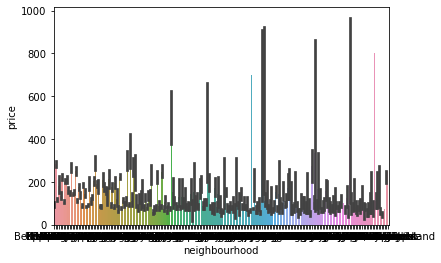

In [39]:
sns.barplot(x='neighbourhood', y='price',data=airbnb)

From the graph, we can see that neighbourhood itself are multiple variables so creating dummies for this categorical variable might not be reasonable.

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

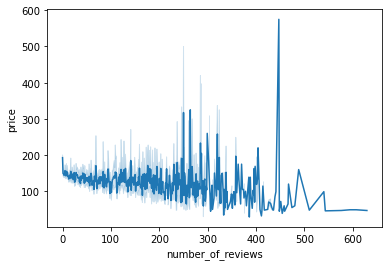

In [40]:
sns.lineplot(x="number_of_reviews", y="price", data=airbnb)


<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

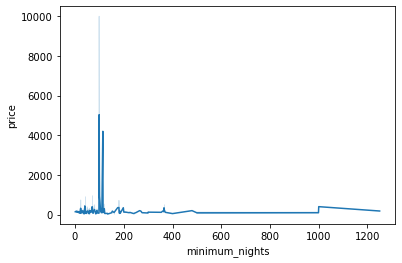

In [41]:
sns.lineplot(x='minimum_nights', y='price', data=airbnb)

<AxesSubplot:>

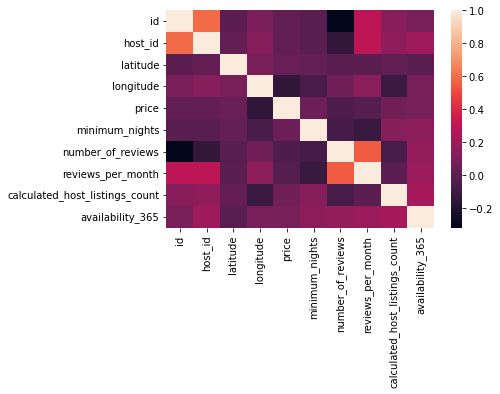

In [42]:
sns.heatmap(airbnb.corr())

In [43]:
airbnb = pd.get_dummies(airbnb, columns=['neighbourhood_group'], drop_first=True, prefix='nbh')
airbnb = pd.get_dummies(airbnb, columns=['room_type'], drop_first=True, prefix='rt')
airbnb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,nbh_Brooklyn,nbh_Manhattan,nbh_Queens,nbh_Staten Island,rt_Private room,rt_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,1,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,1,0,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaN,NaN,1,365,0,1,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaN,NaN,2,9,1,0,0,0,1,0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,NaN,NaN,2,36,1,0,0,0,1,0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,NaN,NaN,1,27,0,1,0,0,0,0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaN,NaN,6,2,0,1,0,0,0,1


Dummies for neighbourhood and room type were created to see if they can help in the machine learning analysis. Latitude and longitude gives the exact location, the number of review would show that how many people have been and reviewed the place, availability could change the price based on how frequently it is available so those were taken to compare it with price.

In [44]:
X = airbnb[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'availability_365', 'nbh_Brooklyn', 'nbh_Manhattan', 'nbh_Queens', 'nbh_Staten Island', 'rt_Private room', 'rt_Shared room' ]]
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
airbnb_rand = RandomForestRegressor(n_estimators=200, random_state=42)
airbnb_rand_fit = airbnb_rand.fit(X_train, y_train)


In [45]:
y_pred = airbnb_rand_fit.predict(X_test)
mse_rand = mse(y_test, y_pred)
print ('The mean squared error from the random forest is', mse_rand)

The mean squared error from the random forest is 38962.61788314733


The information below took quite some time to run so I have put the codes and the best obtained result from what I ran rather than keeping it as code. I have changed it into markdown

grid = dict(max_depth = [3, 6, 9, 12, 15, 18], min_samples_leaf = [1, 5, 10, 15, 20])

forest_est = RandomForestRegressor(n_estimators = 200, random_state = 42)

grid_search = GridSearchCV(estimator=forest_est, param_grid=grid, scoring='neg_mean_squared_error')

grid_result = grid_search.fit(X, y)

print("Best result is obtained using", grid_result.best_params_)

Best result is obtained using {'max_depth': 6, 'min_samples_leaf': 5}

In [46]:
airbnb_rand = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=6, min_samples_leaf=5)
airbnb_rand_fit = airbnb_rand.fit(X_train, y_train)
y_pred = airbnb_rand_fit.predict(X_test)
mse_rand = mse(y_test, y_pred)
print ('After the optimizer the mean squared error is', mse_rand)

After the optimizer the mean squared error is 35152.029674496356


We can see that in an MSE in tens of thousand, the optimizer improved the MSE by almost 10% from the one before.

In [47]:
airbnb['prepare'] = airbnb['name'].str.lower()
airbnb

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,nbh_Brooklyn,nbh_Manhattan,nbh_Queens,nbh_Staten Island,rt_Private room,rt_Shared room,prepare
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,0.21,6,365,1,0,0,0,1,0,clean & quiet apt home by the park
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,0.38,2,355,0,1,0,0,0,0,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,NaN,1,365,0,1,0,0,1,0,the village of harlem....new york !
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,4.64,1,194,1,0,0,0,0,0,cozy entire floor of brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0.10,1,0,0,1,0,0,0,0,entire apt: spacious studio/loft by central park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,...,NaN,2,9,1,0,0,0,1,0,charming one bedroom - newly renovated rowhouse
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,...,NaN,2,36,1,0,0,0,1,0,affordable room in bushwick/east williamsburg
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,...,NaN,1,27,0,1,0,0,0,0,sunny studio at historical neighborhood
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,...,NaN,6,2,0,1,0,0,0,1,43rd st. time square-cozy single bed


In [48]:
airbnb.prepare.isna().value_counts()

False    48879
True        16
Name: prepare, dtype: int64

In [49]:
airbnb_2 = airbnb.dropna(subset=['prepare'])
airbnb_2.reset_index(drop=True, inplace=True)
airbnb_2.head()
airbnb_2.shape


(48879, 21)

Null values were dropped and stored in a new dataframe to make sure we have an unaltered copy when we kept the null values the split function was taking it as float variable and wanted only string as it would be empty, it was better to drop it rather than change it to string. The index was reset because we have to later apply the same index to connect the count vectorizer to the original information.

In [50]:
airbnb_2.prepare.isna().value_counts()

False    48879
Name: prepare, dtype: int64

In [51]:
airbnb_2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,nbh_Brooklyn,nbh_Manhattan,nbh_Queens,nbh_Staten Island,rt_Private room,rt_Shared room,prepare
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,0.21,6,365,1,0,0,0,1,0,clean & quiet apt home by the park
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,0.38,2,355,0,1,0,0,0,0,skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,NaN,1,365,0,1,0,0,1,0,the village of harlem....new york !
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,4.64,1,194,1,0,0,0,0,0,cozy entire floor of brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0.10,1,0,0,1,0,0,0,0,entire apt: spacious studio/loft by central park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,...,NaN,2,9,1,0,0,0,1,0,charming one bedroom - newly renovated rowhouse
48875,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,...,NaN,2,36,1,0,0,0,1,0,affordable room in bushwick/east williamsburg
48876,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,...,NaN,1,27,0,1,0,0,0,0,sunny studio at historical neighborhood
48877,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,...,NaN,6,2,0,1,0,0,0,1,43rd st. time square-cozy single bed


In [52]:
airbnb_2['split'] = airbnb_2['prepare'].apply(lambda x: x.split())
airbnb_2

/var/folders/0q/7yfv43d952dbrjwdnvllyvq40000gn/T/ipykernel_5769/1370683624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_2['split'] = airbnb_2['prepare'].apply(lambda x: x.split())


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,nbh_Brooklyn,nbh_Manhattan,nbh_Queens,nbh_Staten Island,rt_Private room,rt_Shared room,prepare,split
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,6,365,1,0,0,0,1,0,clean & quiet apt home by the park,"[clean, &, quiet, apt, home, by, the, park]"
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,2,355,0,1,0,0,0,0,skylit midtown castle,"[skylit, midtown, castle]"
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,1,365,0,1,0,0,1,0,the village of harlem....new york !,"[the, village, of, harlem....new, york, !]"
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,1,194,1,0,0,0,0,0,cozy entire floor of brownstone,"[cozy, entire, floor, of, brownstone]"
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,1,0,0,1,0,0,0,0,entire apt: spacious studio/loft by central park,"[entire, apt:, spacious, studio/loft, by, cent..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,...,2,9,1,0,0,0,1,0,charming one bedroom - newly renovated rowhouse,"[charming, one, bedroom, -, newly, renovated, ..."
48875,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,...,2,36,1,0,0,0,1,0,affordable room in bushwick/east williamsburg,"[affordable, room, in, bushwick/east, williams..."
48876,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,...,1,27,0,1,0,0,0,0,sunny studio at historical neighborhood,"[sunny, studio, at, historical, neighborhood]"
48877,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,...,6,2,0,1,0,0,0,1,43rd st. time square-cozy single bed,"[43rd, st., time, square-cozy, single, bed]"


In [53]:
airbnb_2['split_final'] = airbnb_2['split'].apply(lambda x: ' '.join(x))
airbnb_2

/var/folders/0q/7yfv43d952dbrjwdnvllyvq40000gn/T/ipykernel_5769/2682341749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_2['split_final'] = airbnb_2['split'].apply(lambda x: ' '.join(x))


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,availability_365,nbh_Brooklyn,nbh_Manhattan,nbh_Queens,nbh_Staten Island,rt_Private room,rt_Shared room,prepare,split,split_final
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,365,1,0,0,0,1,0,clean & quiet apt home by the park,"[clean, &, quiet, apt, home, by, the, park]",clean & quiet apt home by the park
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,355,0,1,0,0,0,0,skylit midtown castle,"[skylit, midtown, castle]",skylit midtown castle
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,365,0,1,0,0,1,0,the village of harlem....new york !,"[the, village, of, harlem....new, york, !]",the village of harlem....new york !
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,194,1,0,0,0,0,0,cozy entire floor of brownstone,"[cozy, entire, floor, of, brownstone]",cozy entire floor of brownstone
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0,0,1,0,0,0,0,entire apt: spacious studio/loft by central park,"[entire, apt:, spacious, studio/loft, by, cent...",entire apt: spacious studio/loft by central park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,...,9,1,0,0,0,1,0,charming one bedroom - newly renovated rowhouse,"[charming, one, bedroom, -, newly, renovated, ...",charming one bedroom - newly renovated rowhouse
48875,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,...,36,1,0,0,0,1,0,affordable room in bushwick/east williamsburg,"[affordable, room, in, bushwick/east, williams...",affordable room in bushwick/east williamsburg
48876,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,...,27,0,1,0,0,0,0,sunny studio at historical neighborhood,"[sunny, studio, at, historical, neighborhood]",sunny studio at historical neighborhood
48877,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,...,2,0,1,0,0,0,1,43rd st. time square-cozy single bed,"[43rd, st., time, square-cozy, single, bed]",43rd st. time square-cozy single bed


In [54]:
stop_words_test = list(stopwords.words("english"))

vect = CountVectorizer(stop_words = stop_words_test)

review = vect.fit_transform(airbnb_2['split_final'])

review_df = pd.DataFrame(review.toarray(), columns=vect.get_feature_names())

review_df.head()

review_df.shape

(48879, 7955)

In [55]:
word_count = review_df.sum(axis=0).sort_values(ascending = False)
word_count[:20]

room            10281
bedroom          8205
private          7409
apartment        6760
cozy             5097
apt              4740
brooklyn         4175
studio           4106
spacious         3796
manhattan        3592
park             3161
east             3107
sunny            2945
williamsburg     2742
beautiful        2514
near             2373
village          2346
nyc              2285
loft             2098
large            2084
dtype: int64

In [56]:
stop_words_new = list(stopwords.words("english")) + ['brooklyn', 'manhattan', 'room', 'bedroom', 'apartment', 'apt', 'studio', 'williamsburg', 'nyc', 'near']
vect_new = CountVectorizer(stop_words = stop_words_new)

review = vect_new.fit_transform(airbnb_2['split_final'])

review_df_new = pd.DataFrame(review.toarray(), columns=vect_new.get_feature_names())

word_count_new = review_df_new.sum(axis=0).sort_values(ascending = False)
topten = pd.DataFrame(word_count_new[:10])
topten


,0
private,7409
cozy,5097
spacious,3796
park,3161
east,3107
sunny,2945
beautiful,2514
village,2346
loft,2098
large,2084


In [57]:
topten_words = topten.index.values.tolist()
topten_words

['private',
 'cozy',
 'spacious',
 'park',
 'east',
 'sunny',
 'beautiful',
 'village',
 'loft',
 'large']

In [58]:
review_df_new

,00,000,000sf,000sqft,001,001ll,002,003,004,005,...,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞから3駅,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,ｷｯﾁﾝ付き,ｷﾚｲなお部屋,ﾆｭｰﾖｰｸの中心,ﾌﾞﾙｯｸﾘﾝの大人気ｴﾘｱ,ﾌﾞﾙｯｸﾘﾝの大人気ｴﾘｱのｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞから3駅,ﾏﾝﾊｯﾀﾝ,ﾏﾝﾊｯﾀﾝ10分,ﾐｯﾄﾞﾀｳﾝｳｴｽﾄｻｲﾄﾞ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
for col in topten_words:
    extracted_columns = review_df_new[col]
    airbnb_2 = airbnb_2.join(extracted_columns)
airbnb_2
   


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,private,cozy,spacious,park,east,sunny,beautiful,village,loft,large
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,0,0,0,1,0,0,0,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,0,0,0,0,0,0,0,0,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,0,0,0,0,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,0,1,0,0,0,0,0,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48874,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,...,0,0,0,0,0,0,0,0,0,0
48875,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,...,0,0,0,0,1,0,0,0,0,0
48876,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,...,0,0,0,0,0,1,0,0,0,0
48877,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,...,0,1,0,0,0,0,0,0,0,0


Adding the columns extracted from the count vectorizer to the original set.

In [60]:
X = airbnb_2[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'availability_365', 'nbh_Brooklyn', 'nbh_Manhattan', 'nbh_Queens', 'nbh_Staten Island', 'rt_Private room', 'rt_Shared room', 'private', 'cozy', 'spacious', 'park', 'east', 'sunny', 'beautiful', 'village', 'loft', 'large']]
y = airbnb_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
airbnb_rand = RandomForestRegressor(n_estimators=200, random_state=42)
airbnb_rand_fit = airbnb_rand.fit(X_train, y_train)

airbnb_rand = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=6, min_samples_leaf=5)
airbnb_rand_fit = airbnb_rand.fit(X_train, y_train)
y_pred = airbnb_rand_fit.predict(X_test)
mse_rand = mse(y_test, y_pred)
print (mse_rand)

32628.857025577083


Adding the 10 most frequent words, we could improve the optimized random forest another 10% and increasing it from the original by 20%